In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# get data from network_backup_dataset.csv
backup_df = pd.read_csv('network_backup_dataset.csv')

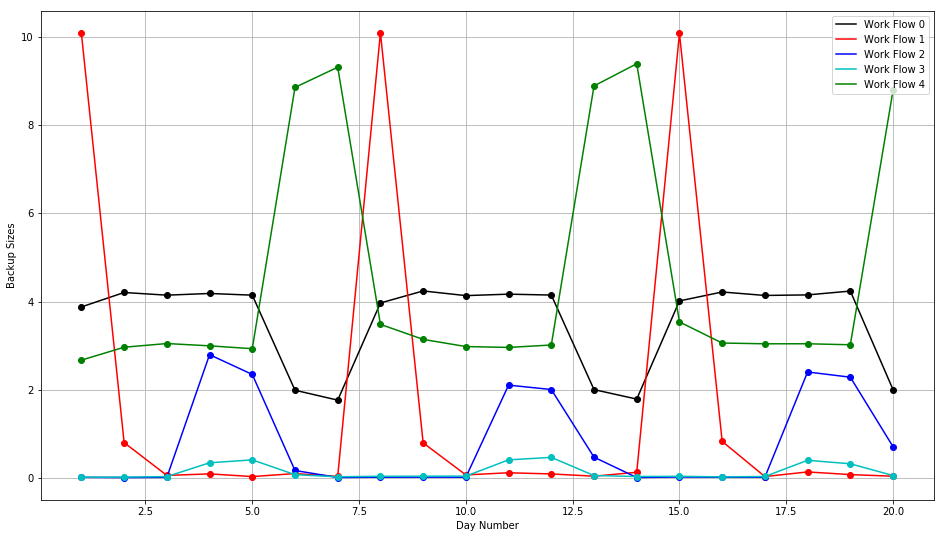

In [2]:
import matplotlib.pyplot as plt

Bdf = backup_df.rename(index=str, columns={"Work-Flow-ID": "id", "Size of Backup (GB)": "size","Day of Week":"day", "Week #":"week"})

colors = ['k','r','b','c','g']

"""
Use the following code to generate a bar chart
BKSPrev = [];
for i in np.arange(106):
    BKSPrev.append(0)
    
plt.figure(figsize=(16, 9))

for i in np.arange(0,5):
    Slice = Bdf.loc[lambda df: df.id == 'work_flow_%d' % i, :]
    GroupedSlice = Slice.groupby(['week', 'day'], sort=False)
    SliceSizes = GroupedSlice['size'].sum()

    BKS = []
    for bks in SliceSizes:
        BKS.append(bks)
    #plt.plot(np.arange(20)+1, BKS[0:20],label = 'Work Flow %d' % i)
    plt.bar(np.arange(20)+1, BKS[0:20],bottom = BKSPrev[0:20],width = 0.7,color = colors[i])
    
    BKSPrev = [sum(x) for x in zip(BKSPrev, BKS)]

plt.xlabel('Day Number')
plt.ylabel('Backup Sizes')
plt.legend()
"""

plt.figure(figsize=(16, 9))
for i in np.arange(0,5):
    Slice = Bdf.loc[lambda df: df.id == 'work_flow_%d' % i, :]
    GroupedSlice = Slice.groupby(['week', 'day'], sort=False)
    SliceSizes = GroupedSlice['size'].sum()

    BKS = []
    for bks in SliceSizes:
        BKS.append(bks)
    plt.plot(np.arange(20)+1, BKS[0:20],colors[i], label = 'Work Flow %d' % i)
    plt.plot(np.arange(20)+1, BKS[0:20], colors[i]+'o')
plt.xlabel('Day Number')
plt.ylabel('Backup Sizes')
plt.grid()
plt.legend(loc = 1)
plt.show()

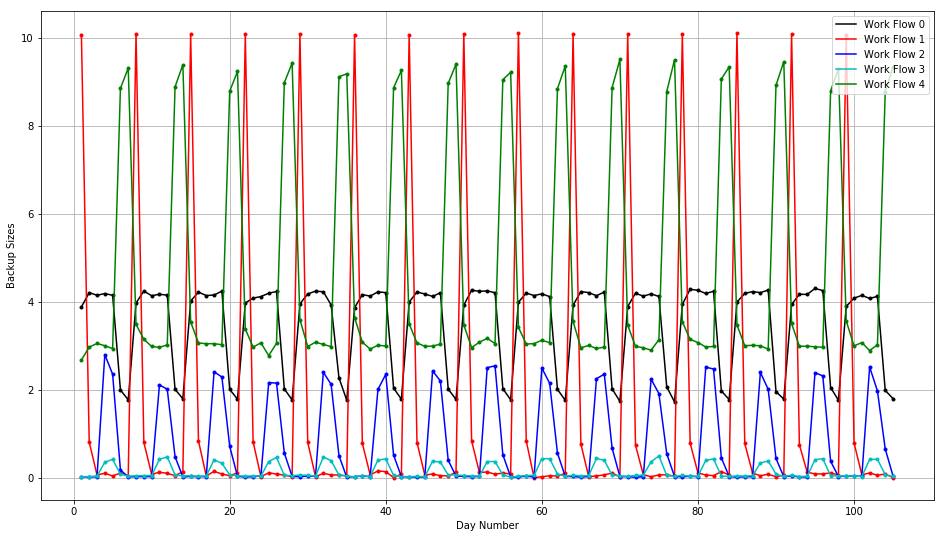

In [3]:
plt.figure(figsize=(16, 9))
for i in np.arange(0,5):
    Slice = Bdf.loc[lambda df: df.id == 'work_flow_%d' % i, :]
    GroupedSlice = Slice.groupby(['week', 'day'], sort=False)
    SliceSizes = GroupedSlice['size'].sum()

    BKS = []
    for bks in SliceSizes:
        BKS.append(bks)
    plt.plot(np.arange(105)+1, BKS, colors[i], label = 'Work Flow %d' % i)
    plt.plot(np.arange(105)+1, BKS, colors[i]+'.')
plt.xlabel('Day Number')
plt.ylabel('Backup Sizes')
plt.grid()
plt.legend(loc = 1)
plt.show()

In [4]:
def get_result(MSE,Y,predicted):
    # report training and test RMSE
    trainRMSE = np.sqrt(MSE['train_score'])
    testRMSE = np.sqrt(MSE['test_score'])
    print('Train RMSE = ',trainRMSE)
    print('Test RMSE = ', testRMSE)
    
    # plot fitted values against true values
    """
    plt.scatter(Y, predicted, edgecolors=(0, 0, 0))
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
    plt.xlabel('True Values')
    plt.ylabel('Fitted Values')
    plt.show()
    """
    #plt.figure(figsize=(16,9))
    plt.figure()
    plt.scatter(np.arange(1,(Y.size+1)), Y,marker='.', c = 'r', label = 'True Values')
    plt.scatter(np.arange(1,(Y.size+1)), predicted,marker='.',c = 'b', label = 'Fitted Values')
    plt.xlabel('Data Index')
    plt.ylabel('Backup Size (GB)')
    plt.title('Fitted Values and True Values over Number of Data Point')
    plt.legend()
    plt.grid()
    plt.show()

    # plot residuals versus fitted values
    residuals = Y - predicted

    #plt.figure(figsize=(16,9))
    plt.figure()
    plt.scatter(np.arange(1,(Y.size+1)), residuals,marker='.', c = 'r', label = 'Residuals')
    plt.scatter(np.arange(1,(Y.size+1)), predicted,marker='.',c = 'b', label = 'Fitted Values')
    plt.xlabel('Data Index')
    plt.ylabel('Backup Size (GB)')    
    plt.title('Fitted Values and Residuals over Number of Data Point')
    plt.legend()
    plt.grid()
    plt.show()

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# scaler encoding
bk_se = backup_df.copy()
dow = le.fit_transform(bk_se['Day of Week'].values)
wfi = le.fit_transform(bk_se['Work-Flow-ID'].values)
fn = le.fit_transform(bk_se['File Name'].values)

bk_se['Day of Week'] = bk_se['Day of Week'].replace(bk_se['Day of Week'].values, dow)
bk_se['Work-Flow-ID'] = bk_se['Work-Flow-ID'].replace(bk_se['Work-Flow-ID'].values, wfi)
bk_se['File Name'] = bk_se['File Name'].replace(bk_se['File Name'].values, fn)

Train RMSE =  [ 0.10154324  0.10215321  0.10153619  0.1021405   0.10150314  0.10212658
  0.10151588  0.10212573  0.10151381  0.10218052]
Test RMSE =  [ 0.10452384  0.0990271   0.10457893  0.0991425   0.10486548  0.09927142
  0.10475605  0.09928238  0.10477973  0.09878119]


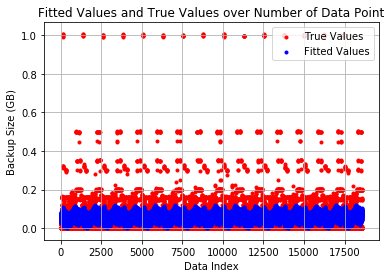

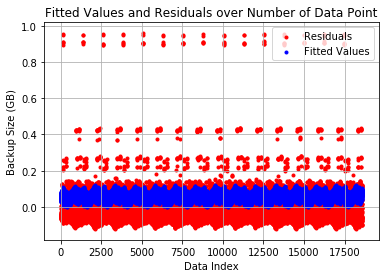

In [27]:
# Problem 2(a) i
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer

X = bk_se.iloc[:,0:5].values
Y = bk_se['Size of Backup (GB)'].values
lr = linear_model.LinearRegression()

mse = make_scorer(mean_squared_error)
MSE = cross_validate(lr, X, Y, scoring=mse, cv=10,return_train_score=True)
predicted = cross_val_predict(lr, X, Y, cv=10)

get_result(MSE,Y,predicted)

Train RMSE =  [ 0.10154324  0.10215321  0.10153619  0.1021405   0.10150314  0.10212658
  0.10151588  0.10212573  0.10151381  0.10218052]
Test RMSE =  [ 0.10452384  0.0990271   0.10457893  0.0991425   0.10486548  0.09927142
  0.10475605  0.09928238  0.10477973  0.09878119]


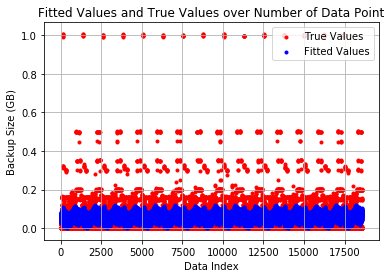

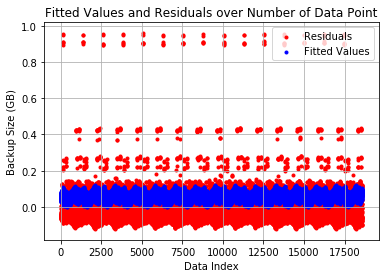

In [7]:
# Problem 2(a) ii
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

MSE = cross_validate(lr, X_std, Y, scoring=mse, cv=10,return_train_score=True)
predicted = cross_val_predict(lr, X_std, Y, cv=10)

get_result(MSE,Y,predicted)

In [8]:
# Problem 2(a) iii
import itertools
from sklearn.feature_selection import f_regression, mutual_info_regression

# for subset in itertools.combinations(X_std.T, 3):    
#     X_select = np.asarray(subset).T
#     f_test, _ = f_regression(X_select, Y)
#     f_test /= np.max(f_test)
#     mi = mutual_info_regression(X_select, Y)
#     mi /= np.max(mi)
#     print(X_select)
#     print(f_test)
#     print(mi)
#     print('----------------------------------')
f_test, _ = f_regression(X_std, Y)
f_test /= np.max(f_test)
mi = mutual_info_regression(X_std, Y)
mi /= np.max(mi)
print(f_test)
print(mi)


[  1.83383477e-05   4.78772999e-01   3.27138366e-01   5.67261995e-02
   1.00000000e+00]
[ 0.00472584  0.30996876  0.39614507  0.99028939  1.        ]


the 3 most important features found by f_regression are "Day of Week", "Backup Start Time - Hour of Day", "File Name"
the 3 most important features found by mutual information regressioin are "Backup Start Time - Hour of Day", "Work-Flow-ID", "File Name"

Train RMSE =  [ 0.1016061   0.10216818  0.10159615  0.10215525  0.1015632   0.10214068
  0.10157524  0.10213987  0.10157475  0.10219622]
Test RMSE =  [ 0.10425328  0.09918864  0.10434303  0.09930925  0.10463008  0.099442
  0.10452742  0.09945073  0.10453043  0.09892711]


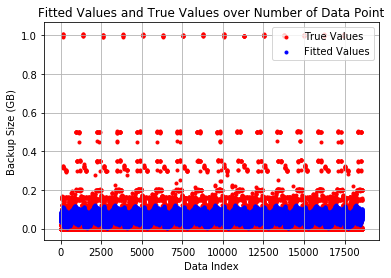

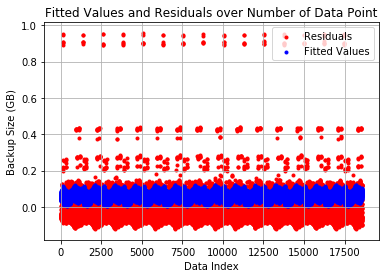

In [9]:
# use the 3 most important features found by f_regression to train the model
X_sel_f = X_std[:, [1,2,4]]

MSE = cross_validate(lr, X_sel_f, Y, scoring=mse, cv=10,return_train_score=True)
predicted = cross_val_predict(lr, X_sel_f, Y, cv=10)
get_result(MSE,Y,predicted)

Train RMSE =  [ 0.10213523  0.10283021  0.10211622  0.10281771  0.10208946  0.10280243
  0.10209284  0.1028056   0.1020995   0.10285864]
Test RMSE =  [ 0.10547694  0.0992055   0.10563258  0.09932176  0.10586641  0.09946736
  0.10583528  0.09943828  0.10578305  0.09893787]


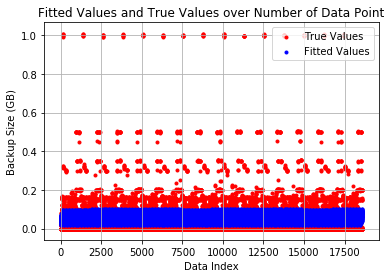

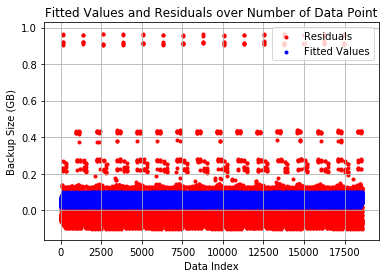

In [10]:
# use the 3 most important features found by mutual information regression to train the model
X_sel_mi = X_std[:, [2,3,4]]

MSE = cross_validate(lr, X_sel_mi, Y, scoring=mse, cv=10,return_train_score=True)
predicted = cross_val_predict(lr, X_sel_mi, Y, cv=10)
get_result(MSE,Y,predicted)

In [28]:
# Problem 2(a) iv
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# one hot encoding
bk_ohe = bk_se.copy()

wn_ohe = ohe.fit_transform(bk_ohe['Week #'].values.reshape(-1,1)).toarray()
dow_ohe = ohe.fit_transform(bk_ohe['Day of Week'].values.reshape(-1,1)).toarray()
bst_ohe = ohe.fit_transform(bk_ohe['Backup Start Time - Hour of Day'].values.reshape(-1,1)).toarray()
wfi_ohe = ohe.fit_transform(bk_ohe['Work-Flow-ID'].values.reshape(-1,1)).toarray()
fn_ohe = ohe.fit_transform(bk_ohe['File Name'].values.reshape(-1,1)).toarray()
oheList = [wn_ohe, dow_ohe, bst_ohe, wfi_ohe, fn_ohe]

wn_se = X[:, 0].reshape(-1,1)
dow_se = X[:, 1].reshape(-1,1)
bst_se = X[:, 2].reshape(-1,1)
wfi_se = X[:, 3].reshape(-1,1)
fn_se = X[:, 4].reshape(-1,1)

In [29]:
trainRMSEs = [];
testRMSEs = [];

for integer in np.arange(32, dtype=np.uint8):
        wnIn = wn_se
        dowIn = dow_se
        bstIn = bst_se
        wfiIn = wfi_se
        fnIn = fn_se
        
        comb = np.unpackbits(integer)[3:8]
        if comb[0] == 1: wnIn = wn_ohe
        if comb[1] == 1: dowIn = dow_ohe
        if comb[2] == 1: bstIn = bst_ohe
        if comb[3] == 1: wfiIn = wfi_ohe
        if comb[4] == 1: fnIn = fn_ohe
            
        X_combine = np.concatenate((wnIn, dowIn, bstIn, wfiIn, fnIn), axis=1)
        
        MSE = cross_validate(lr, X_combine, Y, scoring=mse, cv=10,return_train_score=True)
        predicted = cross_val_predict(lr, X_combine, Y, cv=10)
        trainRMSE = np.sqrt(np.mean(MSE['train_score']))
        testRMSE = np.sqrt(np.mean(MSE['test_score']))
        trainRMSEs.append(trainRMSE)
        testRMSEs.append(testRMSE)
        
        print(comb)
        print('trainRMSE = ',trainRMSE)
        print('testRMSE = ', testRMSE)
        print('-' * 20)

[0 0 0 0 0]
trainRMSE =  0.101834358198
testRMSE =  0.101939446242
--------------------
[0 0 0 0 1]
trainRMSE =  0.0907935951756
testRMSE =  0.0909684230583
--------------------
[0 0 0 1 0]
trainRMSE =  0.0907948766453
testRMSE =  0.0909670926834
--------------------
[0 0 0 1 1]
trainRMSE =  0.0907935759759
testRMSE =  0.0909682884542
--------------------
[0 0 1 0 0]
trainRMSE =  0.10058564759
testRMSE =  0.100704987861
--------------------
[0 0 1 0 1]
trainRMSE =  0.0893840590338
testRMSE =  0.0895744436239
--------------------
[0 0 1 1 0]
trainRMSE =  0.0893853439172
testRMSE =  0.0895729253524
--------------------
[0 0 1 1 1]
trainRMSE =  0.0893850674503
testRMSE =  0.0895748407468
--------------------
[0 1 0 0 0]
trainRMSE =  0.10088849139
testRMSE =  0.100975146028
--------------------
[0 1 0 0 1]
trainRMSE =  0.0897536379649
testRMSE =  0.0899070749436
--------------------
[0 1 0 1 0]
trainRMSE =  0.089754756635
testRMSE =  0.0899067530381
--------------------
[0 1 0 1 1]
trainRM

Optimal combination = 
[0 1 1 1 0]
trainRMSE =  0.0883374686358
testRMSE =  0.0885042308482


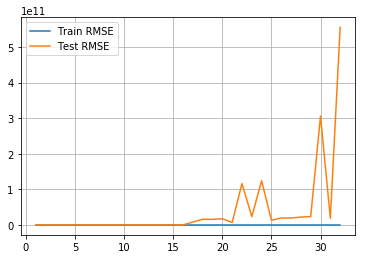

In [30]:
Iopt = np.argmin(testRMSEs)
print('Optimal combination = ')
print(np.unpackbits(np.uint8(Iopt))[3:8])
print('trainRMSE = ',trainRMSEs[Iopt])
print('testRMSE = ', testRMSEs[Iopt])
    
plt.plot(np.arange(1,33),trainRMSEs,label = 'Train RMSE')
plt.plot(np.arange(1,33),testRMSEs,label = 'Test RMSE')
plt.grid()
plt.legend()
plt.show()

In [31]:
# coefficients for the un-regularized best model
best_com = np.unpackbits(np.uint8(Iopt))[3:8]

wnIn = wn_se
dowIn = dow_se
bstIn = bst_se
wfiIn = wfi_se
fnIn = fn_se    
if best_com[0] == 1: wnIn = wn_ohe
if best_com[1] == 1: dowIn = dow_ohe
if best_com[2] == 1: bstIn = bst_ohe
if best_com[3] == 1: wfiIn = wfi_ohe
if best_com[4] == 1: fnIn = fn_ohe
X_combine = np.concatenate((wnIn, dowIn, bstIn, wfiIn, fnIn), axis=1)
lr.fit(X_combine, Y)
print('coeff = ', lr.coef_)

coeff =  [  1.12080290e-05  -5.70658132e-03   3.93117308e-02   3.27726045e-03
   1.49677266e-03  -5.24818634e-03  -1.28639898e-02  -2.02670065e-02
  -2.02050689e-02  -2.10615368e-02   7.79151685e-03   3.34547671e-02
  -1.98706656e-03   2.00738820e-03   3.82266876e-02  -1.41018903e-02
  -4.01397166e-02  -5.68947516e-02   7.29096710e-02   7.75317015e-06]


In [14]:
#2(a) v-i Ridge Regulation
from sklearn.linear_model import Ridge
parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

bestAlpha = []
bestTestRMSE = []
bestComb = []
for alpha in parameters:
    ridge = Ridge(alpha = alpha, random_state = 42)
    print('alpha = ', alpha)
    bestAlpha.append(alpha)
    
    trainRMSEs = [];
    testRMSEs = [];
    for integer in np.arange(32, dtype=np.uint8):
            wnIn = wn_se
            dowIn = dow_se
            bstIn = bst_se
            wfiIn = wfi_se
            fnIn = fn_se
        
            comb = np.unpackbits(integer)[3:8]
            if comb[0] == 1: wnIn = wn_ohe
            if comb[1] == 1: dowIn = dow_ohe
            if comb[2] == 1: bstIn = bst_ohe
            if comb[3] == 1: wfiIn = wfi_ohe
            if comb[4] == 1: fnIn = fn_ohe
            
            X_combine = np.concatenate((wnIn, dowIn, bstIn, wfiIn, fnIn), axis=1)
        
            MSE = cross_validate(ridge, X_combine, Y, scoring=mse, cv=10,return_train_score=True)
            trainRMSE = np.sqrt(np.mean(MSE['train_score']))
            testRMSE = np.sqrt(np.mean(MSE['test_score']))
            
            trainRMSEs.append(trainRMSE)
            testRMSEs.append(testRMSE)
            

    Iopt = np.argmin(testRMSEs)
    best_com = np.unpackbits(np.uint8(Iopt))[3:8]
    print('Optimal combination = ')
    print(best_com)
    bestComb.append(best_com)
    
    wnIn = wn_se
    dowIn = dow_se
    bstIn = bst_se
    wfiIn = wfi_se
    fnIn = fn_se    
    if best_com[0] == 1: wnIn = wn_ohe
    if best_com[1] == 1: dowIn = dow_ohe
    if best_com[2] == 1: bstIn = bst_ohe
    if best_com[3] == 1: wfiIn = wfi_ohe
    if best_com[4] == 1: fnIn = fn_ohe
    X_combine = np.concatenate((wnIn, dowIn, bstIn, wfiIn, fnIn), axis=1)
    ridge.fit(X_combine, Y)
    
    print('trainRMSE = ',trainRMSEs[Iopt])
    print('testRMSE = ', testRMSEs[Iopt])
    print('coeff = ', ridge.coef_)
    print('-' * 20) 
    bestTestRMSE.append(testRMSEs[Iopt])

print('-' * 20)
best = np.argmin(bestTestRMSE)
print('One Best Model')   
print('alpha = ', bestAlpha[best])
print('Optimal combination = ')
print(bestComb[best])

alpha =  0.0001
Optimal combination = 
[0 1 1 1 0]
trainRMSE =  0.0883374686358
testRMSE =  0.0885042308432
coeff =  [  1.12080291e-05  -5.70658047e-03   3.93117300e-02   3.27726095e-03
   1.49677323e-03  -5.24818553e-03  -1.28639886e-02  -2.02670051e-02
  -2.02050737e-02  -2.10615415e-02   7.79151116e-03   3.34547606e-02
  -1.98707198e-03   2.00738271e-03   3.82266719e-02  -1.41019049e-02
  -4.01397296e-02  -5.68947646e-02   7.29096541e-02   7.75324172e-06]
--------------------
alpha =  0.001
Optimal combination = 
[0 1 1 1 0]
trainRMSE =  0.0883374686358
testRMSE =  0.0885042307987
coeff =  [  1.12080303e-05  -5.70657899e-03   3.93117159e-02   3.27725928e-03
   1.49677215e-03  -5.24818436e-03  -1.28639846e-02  -2.02669989e-02
  -2.02050630e-02  -2.10615302e-02   7.79151381e-03   3.34547560e-02
  -1.98706695e-03   2.00738714e-03   3.82266761e-02  -1.41018913e-02
  -4.01397017e-02  -5.68947371e-02   7.29096466e-02   7.75388577e-06]
--------------------
alpha =  0.01
Optimal combination

In [15]:
#2(a) v-ii Lasso Regulation
from sklearn.linear_model import Lasso

bestAlpha = []
bestTestRMSE = []
bestComb = []
for alpha in parameters:
    lasso = Lasso(alpha = alpha, random_state = 42)
    print('alpha = ', alpha)
    bestAlpha.append(alpha)
    
    trainRMSEs = [];
    testRMSEs = [];
    
    for integer in np.arange(32, dtype=np.uint8):
        wnIn = wn_se
        dowIn = dow_se
        bstIn = bst_se
        wfiIn = wfi_se
        fnIn = fn_se
        
        comb = np.unpackbits(integer)[3:8]
        if comb[0] == 1: wnIn = wn_ohe
        if comb[1] == 1: dowIn = dow_ohe
        if comb[2] == 1: bstIn = bst_ohe
        if comb[3] == 1: wfiIn = wfi_ohe
        if comb[4] == 1: fnIn = fn_ohe
            
        X_combine = np.concatenate((wnIn, dowIn, bstIn, wfiIn, fnIn), axis=1)
        
        MSE = cross_validate(lasso, X_combine, Y, scoring=mse, cv=10,return_train_score=True)
        trainRMSE = np.sqrt(np.mean(MSE['train_score']))
        testRMSE = np.sqrt(np.mean(MSE['test_score']))
            
        trainRMSEs.append(trainRMSE)
        testRMSEs.append(testRMSE)

    Iopt = np.argmin(testRMSEs)
    print('Optimal combination = ')
    best_com = np.unpackbits(np.uint8(Iopt))[3:8]
    print(best_com)
    bestComb.append(best_com)
    
    wnIn = wn_se
    dowIn = dow_se
    bstIn = bst_se
    wfiIn = wfi_se
    fnIn = fn_se    
    if best_com[0] == 1: wnIn = wn_ohe
    if best_com[1] == 1: dowIn = dow_ohe
    if best_com[2] == 1: bstIn = bst_ohe
    if best_com[3] == 1: wfiIn = wfi_ohe
    if best_com[4] == 1: fnIn = fn_ohe
    X_combine = np.concatenate((wnIn, dowIn, bstIn, wfiIn, fnIn), axis=1)
    lasso.fit(X_combine, Y)
       
    print('trainRMSE = ',trainRMSEs[Iopt])
    print('testRMSE = ', testRMSEs[Iopt])
    print('coeff = ', lasso.coef_)
    print('-' * 20)   
    bestTestRMSE.append(testRMSEs[Iopt])

print('-' * 20)
best = np.argmin(bestTestRMSE)
print('One Best Model')   
print('alpha = ', bestAlpha[best])
print('Optimal combination = ')
print(bestComb[best])

alpha =  0.0001
Optimal combination = 
[1 1 1 1 1]
trainRMSE =  0.0883429583491
testRMSE =  0.0885082484408
coeff =  [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   4.37514320e-02   7.71888574e-03   5.93838483e-03  -0.00000000e+00
  -6.96905340e-03  -1.44485431e-02  -2.10345962e-02  -2.18506979e-02
   5.78177614e-03   3.14450312e-02  -2.79292999e-03   2.96227139e-06
   5.17787527e-02  -0.00000000e+00  -2.56788224e-02  -4.23859230e-02
   8.64849397e-02  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0

In [16]:
from sklearn.linear_model import ElasticNet
l1s = np.arange(0.01,1,0.1)
alphas = [0.01, 0.1, 1, 10, 100, 1000, 10000]

bestAlpha = []
bestl1 = []
bestl2 = []
bestTestRMSE = []
bestComb = []

for alpha in alphas:
    for l1 in l1s:
        elasticnet = ElasticNet(alpha = alpha, l1_ratio = l1, random_state = 42)
        print('alpha = '+ str(alpha) + ', l1 = ' + str(l1 * alpha) + ', l2 = ' + str((1-l1)*alpha))
        
        bestAlpha.append(alpha)
        bestl1.append(l1 * alpha)
        bestl2.append((1-l1)*alpha)
    
        trainRMSEs = [];
        testRMSEs = [];
        coeffs = [];
        for integer in np.arange(32, dtype=np.uint8):
            wnIn = wn_se
            dowIn = dow_se
            bstIn = bst_se
            wfiIn = wfi_se
            fnIn = fn_se
        
            comb = np.unpackbits(integer)[3:8]
            if comb[0] == 1: wnIn = wn_ohe
            if comb[1] == 1: dowIn = dow_ohe
            if comb[2] == 1: bstIn = bst_ohe
            if comb[3] == 1: wfiIn = wfi_ohe
            if comb[4] == 1: fnIn = fn_ohe
            
            X_combine = np.concatenate((wnIn, dowIn, bstIn, wfiIn, fnIn), axis=1)
        
            MSE = cross_validate(elasticnet, X_combine, Y, scoring=mse, cv=10,return_train_score=True)
            trainRMSE = np.sqrt(np.mean(MSE['train_score']))
            testRMSE = np.sqrt(np.mean(MSE['test_score']))
            
            trainRMSEs.append(trainRMSE)
            testRMSEs.append(testRMSE)
            

        Iopt = np.argmin(testRMSEs)
        print('Optimal combination = ')
        best_com = np.unpackbits(np.uint8(Iopt))[3:8]
        print(best_com)
        bestComb.append(best_com)
        
        wnIn = wn_se
        dowIn = dow_se
        bstIn = bst_se
        wfiIn = wfi_se
        fnIn = fn_se    
        if best_com[0] == 1: wnIn = wn_ohe
        if best_com[1] == 1: dowIn = dow_ohe
        if best_com[2] == 1: bstIn = bst_ohe
        if best_com[3] == 1: wfiIn = wfi_ohe
        if best_com[4] == 1: fnIn = fn_ohe
        X_combine = np.concatenate((wnIn, dowIn, bstIn, wfiIn, fnIn), axis=1)
        elasticnet.fit(X_combine, Y)
    
        print('trainRMSE = ',trainRMSEs[Iopt])
        print('testRMSE = ', testRMSEs[Iopt])
        print('coeff = ', elasticnet.coef_)
        print('-' * 20)     
        bestTestRMSE.append(testRMSEs[Iopt])

print('-' * 20)
best = np.argmin(bestTestRMSE)
print('One Best Model')  
print('alpha = '+ str(bestAlpha[best]) + ', l1 = ' + str(bestl1[best]) + ', l2 = ' + str(bestl2[best]))
print('Optimal combination = ')
print(bestComb[best])

alpha = 0.01, l1 = 0.0001, l2 = 0.0099
Optimal combination = 
[1 1 1 1 1]
trainRMSE =  0.0884066628333
testRMSE =  0.0885666334627
coeff =  [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -3.31591581e-03
   3.74568807e-02   3.77285401e-03   2.10566916e-03  -2.92017783e-03
  -9.92300207e-03  -1.69812443e-02  -1.85667022e-02  -1.92574885e-02
   6.77040206e-03   3.10175809e-02  -1.40515899e-03   1.33482689e-03
   3.83796333e-02  -1.04741220e-02  -3.54014578e-02  -5.12447905e-02
   6.86280237e-02   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -3.56389719e-05  -0.00000000e+00  -0.00000000e+00
  -1.62213113e-04  -0.00000000e+00  -0.00000000e+00  -2.64857111e-04
  -1.17037809e-05   0.00000000e+00  -0.00000000e+00  -2.44463200e-04
  -2.82070313e-04  -7.37595035e-

Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.102664590269
testRMSE =  0.102668277049
coeff =  [ 0.         -0.          0.00069725  0.          0.00146259]
--------------------
alpha = 0.1, l1 = 0.041, l2 = 0.059
Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.102786641503
testRMSE =  0.102790377195
coeff =  [ 0.         -0.          0.00048404  0.          0.00132809]
--------------------
alpha = 0.1, l1 = 0.051, l2 = 0.049
Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.102942323781
testRMSE =  0.102946116533
coeff =  [ 0.         -0.          0.00027074  0.          0.00119356]
--------------------
alpha = 0.1, l1 = 0.061, l2 = 0.039
Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.103131521794
testRMSE =  0.103135379679
coeff =  [  0.00000000e+00  -0.00000000e+00   5.73555800e-05   0.00000000e+00
   1.05898623e-03]
--------------------
alpha = 0.1, l1 = 0.071, l2 = 0.029
Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.103252642089
testRMSE =  0.103254199702
coeff =  [ 0

Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.104189628217
testRMSE =  0.104190237886
coeff =  [ 0. -0.  0.  0.  0.]
--------------------
alpha = 1000, l1 = 810.0, l2 = 190.0
Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.104189628217
testRMSE =  0.104190237886
coeff =  [ 0. -0.  0.  0.  0.]
--------------------
alpha = 1000, l1 = 910.0, l2 = 90.0
Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.104189628217
testRMSE =  0.104190237886
coeff =  [ 0. -0.  0.  0.  0.]
--------------------
alpha = 10000, l1 = 100.0, l2 = 9900.0
Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.104189628217
testRMSE =  0.104190237886
coeff =  [ 0. -0.  0.  0.  0.]
--------------------
alpha = 10000, l1 = 1100.0, l2 = 8900.0
Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.104189628217
testRMSE =  0.104190237886
coeff =  [ 0. -0.  0.  0.  0.]
--------------------
alpha = 10000, l1 = 2100.0, l2 = 7900.0
Optimal combination = 
[0 0 0 0 0]
trainRMSE =  0.104189628217
testRMSE =  0.104190237886
coeff = 

In [17]:
# 2(b) i
from sklearn.ensemble import RandomForestRegressor
RFregr = RandomForestRegressor(n_estimators=20, max_depth=4, max_features=5, random_state=0, oob_score=True)
RFregr.fit(X, Y)
oob = RFregr.oob_score_ 
MSE = cross_validate(RFregr, X, Y, scoring=mse, cv=10, return_train_score=True)
predicted = cross_val_predict(lr, X, Y, cv=10)
trainRMSE = np.sqrt(np.mean(MSE['train_score']))
testRMSE = np.sqrt(np.mean(MSE['test_score']))
print('OOB error = ', oob)
print('trainRMSE = ',trainRMSE)
print('testRMSE = ', testRMSE)

OOB error =  0.462183201142
trainRMSE =  0.0758562036039
testRMSE =  0.0760726397527


The best number of trees for max_features = 1 is 145
testRMSE =  0.0861250754311
The best number of trees for max_features = 2 is 14
testRMSE =  0.0786381444334
The best number of trees for max_features = 3 is 2
testRMSE =  0.0728515885559
The best number of trees for max_features = 4 is 113
testRMSE =  0.0730184244879
The best number of trees for max_features = 5 is 2
testRMSE =  0.0748912139753


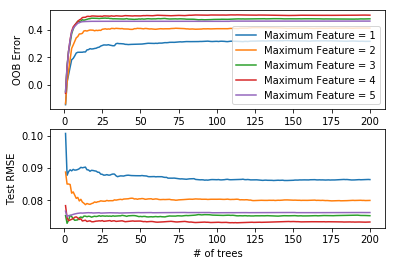

In [18]:
# 2(b) ii
plt.figure(1)
for nFeatures in np.arange(1, 6):
    oob = []
    testRMSE = []
    for nTrees in np.arange(1, 201):
        RFregr = RandomForestRegressor(n_estimators=nTrees, max_depth=4, max_features=nFeatures, random_state=0, oob_score=True)
        RFregr.fit(X, Y)
        oob.append(RFregr.oob_score_)
        MSE = cross_validate(RFregr, X, Y, scoring=mse, cv=10, return_train_score=True)
        testRMSE.append(np.sqrt(np.mean(MSE['test_score'])))
    plt.subplot(211)
    plt.xlabel('# of trees')
    plt.ylabel('OOB Error')
    plt.plot(np.arange(1, 201), oob, label='Maximum Feature = %d' % nFeatures)
    plt.legend()
    
    plt.subplot(212)
    plt.xlabel('# of trees')
    plt.ylabel('Test RMSE')
    plt.plot(np.arange(1, 201), testRMSE, label='Maximum Feature = %d' % nFeatures)
    
    best = np.argmin(testRMSE)
    print('The best number of trees for max_features = '+ str(nFeatures) + ' is ' + str(best+1))
    print('testRMSE = ', testRMSE[best])
plt.show()

The best number of trees for max_depth = 1 is 109
testRMSE =  0.0975340046111
The best number of trees for max_depth = 2 is 5
testRMSE =  0.0907988589473
The best number of trees for max_depth = 3 is 4
testRMSE =  0.0824068477978
The best number of trees for max_depth = 4 is 2
testRMSE =  0.0748912139753
The best number of trees for max_depth = 5 is 2
testRMSE =  0.0588520145196


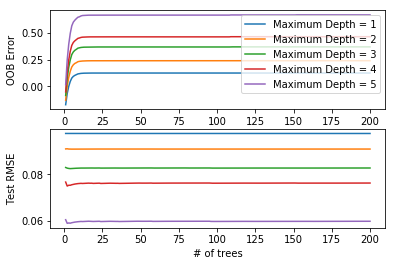

In [19]:
# 2(b) iii
# choose max_depth to experiment on
plt.figure(1)
for nDepth in np.arange(1, 6):
    oob = []
    testRMSE = []
    for nTrees in np.arange(1, 201):
        RFregr = RandomForestRegressor(n_estimators=nTrees, max_depth=nDepth, max_features=5, random_state=0, oob_score=True)
        RFregr.fit(X, Y)
        oob.append(RFregr.oob_score_)
        MSE = cross_validate(RFregr, X, Y, scoring=mse, cv=10, return_train_score=True)
        testRMSE.append(np.sqrt(np.mean(MSE['test_score'])))
    plt.subplot(211)
    plt.xlabel('# of trees')
    plt.ylabel('OOB Error')
    plt.plot(np.arange(1, 201), oob, label='Maximum Depth = %d' % nDepth)
    plt.legend()
    
    plt.subplot(212)
    plt.xlabel('# of trees')
    plt.ylabel('Test RMSE')
    plt.plot(np.arange(1, 201), testRMSE, label='Maximum Depth = %d' % nDepth)
    
    best = np.argmin(testRMSE)
    print('The best number of trees for max_depth = '+ str(nDepth) + ' is ' + str(best+1))
    print('testRMSE = ', testRMSE[best])
plt.show()

In [36]:
# 2(b) iv
RFregr = RandomForestRegressor(n_estimators=2, max_depth=4, max_features=3, random_state=0, oob_score=True)
RFregr.fit(X, Y)
print(RFregr.feature_importances_)

[  2.06464367e-06   3.72203076e-01   7.23952483e-02   5.53855345e-01
   1.54426657e-03]


In [38]:
# 2(b) v
from sklearn.tree import export_graphviz
export_graphviz(RFregr.estimators_[1], out_file='tree.dot', filled=True,label='all', feature_names = ['Week #','Day','Start Time','Work Flow ID','File Name'])


The best number of hidden units for logistic is 41
testRMSE =  0.0894420767545
The best number of hidden units for tanh is 86
testRMSE =  0.0656335291798
The best number of hidden units for relu is 221
testRMSE =  0.0315192585313


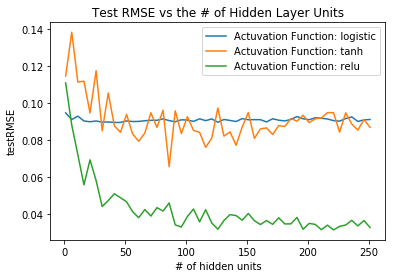

In [39]:
# 2(c)
from sklearn.neural_network import MLPRegressor
X_ohe = np.concatenate((wn_ohe, dow_ohe, bst_ohe, wfi_ohe, fn_ohe), axis=1)
plt.figure()
plt.xlabel('# of hidden units')
plt.ylabel('testRMSE')
plt.title('Test RMSE vs the # of Hidden Layer Units')
for func in ['logistic', 'tanh', 'relu']:    
    testRMSE = []
    for hiddenUnits in np.arange(1,252,5):
        NNregr = MLPRegressor(hidden_layer_sizes=(hiddenUnits,), activation=func)
        MSE = cross_validate(NNregr, X_ohe, Y, scoring=mse, cv=10, return_train_score=True)
        testRMSE.append(np.sqrt(np.mean(MSE['test_score'])))    
    plt.plot(np.arange(1,252,5), testRMSE, label='Actuvation Function: %s' % func)
      
    best = np.argmin(testRMSE)
    print('The best number of hidden units for '+ str(func) + ' is ' + str(5*best+1))
    print('testRMSE = ', testRMSE[best])
plt.legend()
plt.show()

Work Flow 0
Train RMSE =  [ 0.04307895  0.04283438  0.04309656  0.04275493  0.04309807  0.0429287
  0.04303306  0.04291714  0.04307213  0.04293809]
Test RMSE =  [ 0.04241067  0.04455356  0.0421173   0.04513333  0.04209229  0.04361958
  0.04269774  0.04373614  0.04251981  0.04380101]


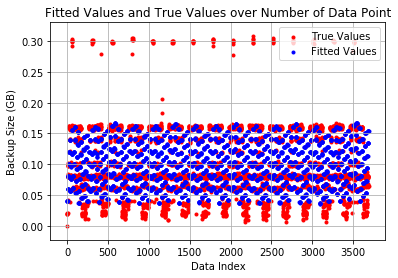

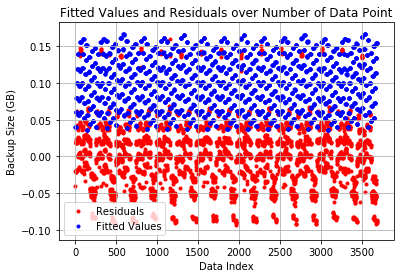

Work Flow 1
Train RMSE =  [ 0.15717888  0.16191316  0.15726258  0.16193623  0.15725725  0.16191919
  0.15726339  0.16192611  0.1571758   0.16188137]
Test RMSE =  [ 0.18136888  0.13876219  0.18010468  0.13789746  0.18002654  0.13793142
  0.18006856  0.13804064  0.18120515  0.13938696]


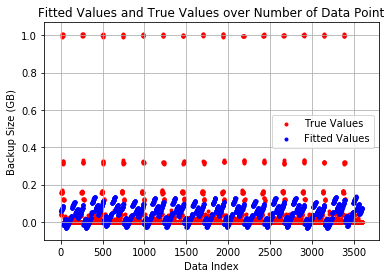

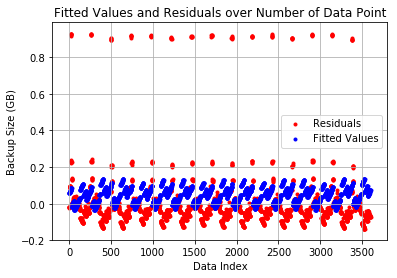

Work Flow 2
Train RMSE =  [ 0.0428332   0.04168059  0.04290199  0.04191167  0.04291241  0.0410894
  0.04267212  0.04176977  0.0429217   0.04162538]
Test RMSE =  [ 0.036634    0.04709567  0.0358339   0.04514946  0.03571543  0.05155346
  0.03822219  0.04633719  0.03576764  0.04759971]


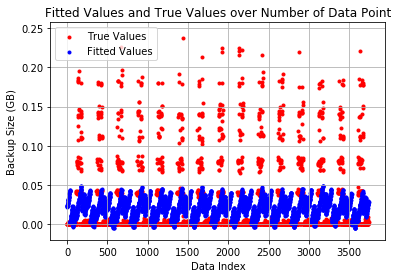

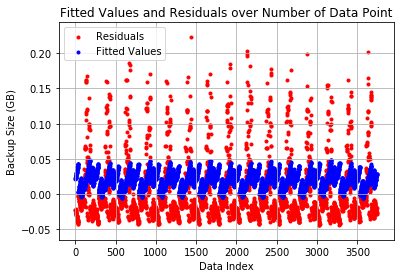

Work Flow 3
Train RMSE =  [ 0.00723074  0.00706057  0.00720375  0.00701659  0.00725731  0.00699842
  0.00716786  0.00697808  0.00720897  0.00704257]
Test RMSE =  [ 0.00602222  0.00762249  0.00629412  0.00797408  0.00571776  0.00811589
  0.00665514  0.00827933  0.00624817  0.00777081]


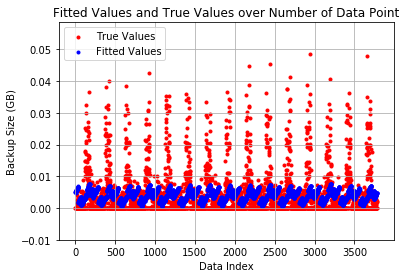

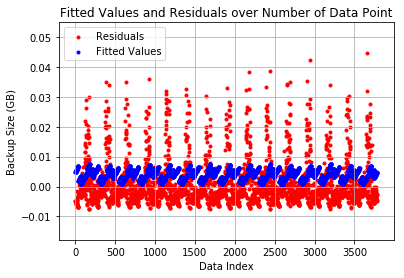

Work Flow 4
Train RMSE =  [ 0.10431588  0.10154417  0.10447142  0.10148748  0.10440379  0.10166213
  0.10441499  0.10152913  0.10440665  0.10161509]
Test RMSE =  [ 0.09142765  0.11589729  0.08913605  0.11607801  0.08975032  0.11464679
  0.08974425  0.11579197  0.09015744  0.11531951]


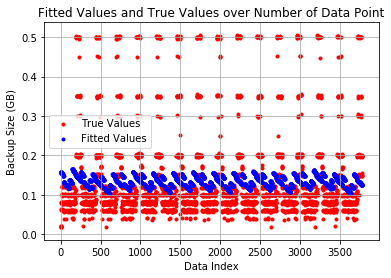

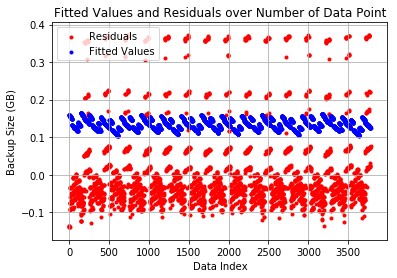

In [40]:
# 2(d)
lr = linear_model.LinearRegression()
mse = make_scorer(mean_squared_error)
    
for i in np.arange(0,5):
    SBdf = Bdf.loc[lambda df: df.id == 'work_flow_%d' % i, :]
    # scaler encoding
    dow = le.fit_transform(SBdf['day'].values)
    fn = le.fit_transform(SBdf['File Name'].values)

    SBdf['day'] = SBdf['day'].replace(SBdf['day'].values, dow)
    SBdf['File Name'] = SBdf['File Name'].replace(SBdf['File Name'].values, fn)
    
    X_rdc = SBdf.iloc[:,[0,1,2,4]].values
    Y = SBdf['size'].values

    MSE = cross_validate(lr, X_rdc, Y, scoring=mse, cv=10,return_train_score=True)
    predicted = cross_val_predict(lr, X_rdc, Y, cv=10)

    print('Work Flow %d'%i)
    get_result(MSE,Y,predicted)

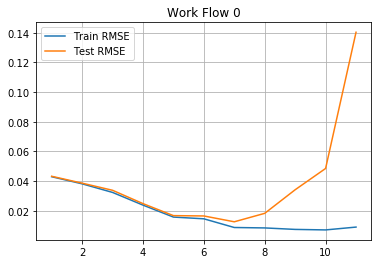

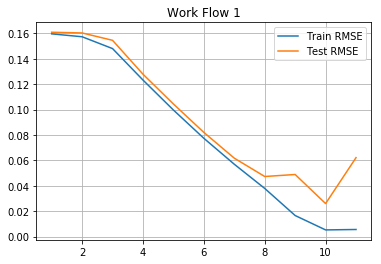

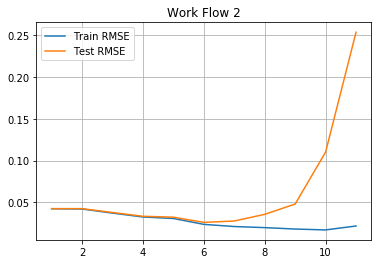

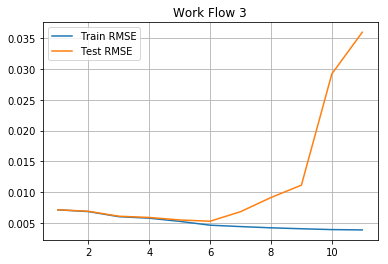

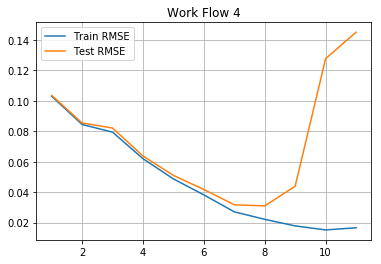

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

lr = linear_model.LinearRegression()
mse = make_scorer(mean_squared_error)

for i in np.arange(0,5):
    SBdf = Bdf.loc[lambda df: df.id == 'work_flow_%d' % i, :]
    # scaler encoding
    dow = le.fit_transform(SBdf['day'].values)
    fn = le.fit_transform(SBdf['File Name'].values)

    SBdf['day'] = SBdf['day'].replace(SBdf['day'].values, dow)
    SBdf['File Name'] = SBdf['File Name'].replace(SBdf['File Name'].values, fn)
    
    X_rdc = SBdf.iloc[:,[0,1,2,4]].values
    Y = SBdf['size'].values
    
    TrainRMSEs = []
    TestRMSEs = []
    
    for n in np.arange(1,12):
        model = Pipeline([('poly', PolynomialFeatures(degree=n)), ('linear', LinearRegression(fit_intercept=False))])
        MSE = cross_validate(model, X_rdc, Y, scoring=mse, cv=10,return_train_score=True)
        predicted = cross_val_predict(model, X_rdc, Y, cv=10)
        trainRMSE = np.sqrt(np.mean(MSE['train_score']))
        testRMSE = np.sqrt(np.mean(MSE['test_score']))
        
        TrainRMSEs.append(trainRMSE)
        TestRMSEs.append(testRMSE)
    
    plt.figure()
    plt.plot(np.arange(1,12),TrainRMSEs,label = 'Train RMSE')
    plt.plot(np.arange(1,12),TestRMSEs,label = 'Test RMSE')
    plt.title('Work Flow ' + str(i))
    plt.legend()
    plt.grid()
    
plt.show()   

The best number of neighbors for ball_treealgorithm is 6
testRMSE =  0.0571242734405
The best number of neighbors for kd_treealgorithm is 6
testRMSE =  0.0562492223861
The best number of neighbors for brutealgorithm is 1
testRMSE =  0.0530581131115


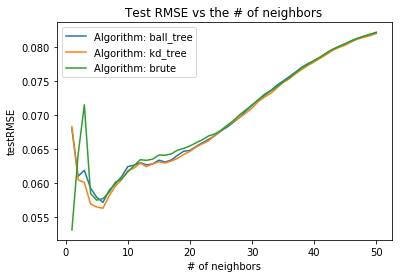

In [25]:
# 2(e)
from sklearn.neighbors import KNeighborsRegressor
plt.figure()
plt.xlabel('# of neighbors')
plt.ylabel('testRMSE')
plt.title('Test RMSE vs the # of neighbors')
for func in ['ball_tree', 'kd_tree', 'brute']:
    testRMSE = []
    for n in np.arange(1,51):
        KNNregr = KNeighborsRegressor(n_neighbors=n, algorithm=func)
        MSE = cross_validate(KNNregr, X, Y, scoring=mse, cv=10, return_train_score=True)
        testRMSE.append(np.sqrt(np.mean(MSE['test_score'])))
        
    plt.plot(np.arange(1,51), testRMSE, label='Algorithm: %s' % func)
    
    best = np.argmin(testRMSE)
    print('The best number of neighbors for '+ str(func) + 'algorithm is ' + str(best+1))
    print('testRMSE = ', testRMSE[best])
plt.legend()
plt.show()